# PDB to NERDSS Converter Tutorial

This notebook shows how to use the **modules** in `ionerdss.model_setup` to:

1. Read or download a PDB/CIF file.
2. Detect binding interfaces.
3. Regularize a coarse‐grained model for NERDSS simulation.

Make sure your `ionerdss` package is either **installed** or that the `ionerdss` folder is on `sys.path`.

In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
sys.path.insert(0, os.path.abspath('../../'))

from ionerdss.model_setup.protein_model import ProteinModel

print('Imports successful!')

Imports successful!


## 1. Create a `ProteinModel`
Below, we demonstrate how to create a `ProteinModel` from a 4-letter PDB ID / PDB file / CIF file.

In [2]:
pdb_id = '../../data/7uhy.cif'
model = ProteinModel(pdb_id)
print('ProteinModel created!')

homologous chains identify finished using the CIF file header: chain ID to molecular type mapping:
{'A': 'A', 'B': 'A', 'A-2': 'A', 'B-2': 'A', 'C': 'B', 'C-2': 'B', 'D': 'C', 'D-2': 'C', 'E': 'D', 'F': 'D', 'G': 'D', 'E-2': 'D', 'F-2': 'D', 'G-2': 'D', 'H': 'E', 'H-2': 'E'}
homogolous chains groups:
[['A', 'B', 'A-2', 'B-2'], ['C', 'C-2'], ['D', 'D-2'], ['E', 'F', 'G', 'E-2', 'F-2', 'G-2'], ['H', 'H-2']]
ProteinModel created!


## 2. Detect Interfaces
We can now detect binding interfaces in the structure.
- `cutoff=0.35` is the maximum distance (in nm) for atom contacts.
- `residue_cutoff=3` means we need at least 3 contacting residues.


In [3]:
model.verbose = False  # set to True for print interfaces
model.detect_interfaces(cutoff=0.35, residue_cutoff=3)
print('Interfaces detected!')

Interfaces detected!


![7uhy.png](../../data/7uhy.png)

## 3. Visualize the Original Coarse‐Grained Structure
This uses Matplotlib’s 3D capabilities to show each chain’s **Center of Mass** and **Interface** points.


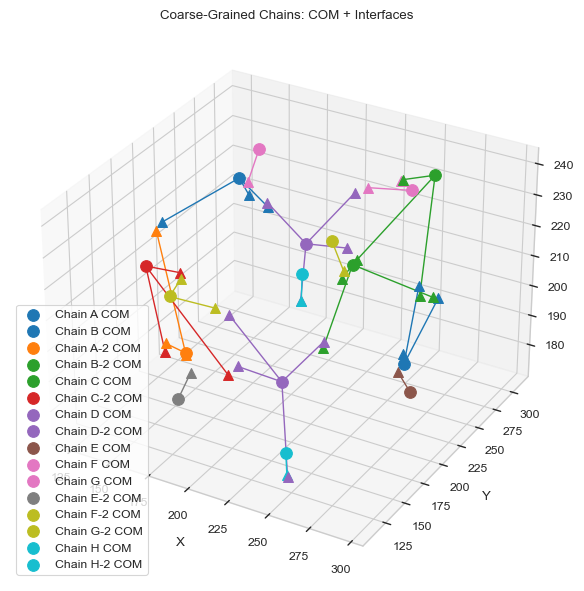

In [4]:
%matplotlib inline

model.plot_original_coarse_grained_structure()

In [5]:
model.save_original_coarse_grained_structure(
    output_cif='coarse_grained.cif',
    pymol_script='visualize_coarse.pml'
)
print('Coarse-grained structure saved, along with a PyMOL script!')
print('You can visualize the coarse-grained structure by running:')
print('pymol visualize_coarse.pml')

Coarse-grained structure saved to coarse_grained.cif.
PyMOL script saved to visualize_coarse.pml.
Coarse-grained structure saved, along with a PyMOL script!
You can visualize the coarse-grained structure by running:
pymol visualize_coarse.pml


## 4. Regularize & Build Reactions
If the structure has homologous chains, we can align them so they share the same geometry.
This also sets up Reaction objects if two chains can bind.


After regularization:


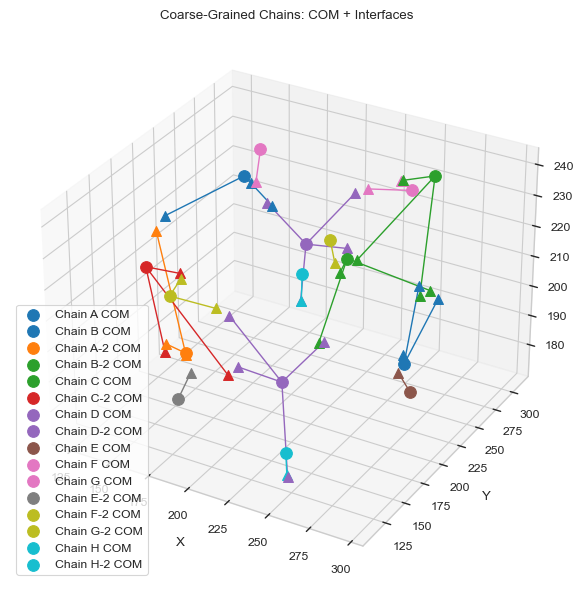

In [6]:
model.regularize_molecules()

print('After regularization:')
model.plot_regularized_structure()

## 5. Saving a Coarse-Grained Structure & PyMOL Script
You can export the coarse-grained data as a `.cif` file, plus a PyMOL script that displays spheres for COM and interface points.


In [7]:
model.save_regularized_coarse_grained_structure(
    output_cif='coarse_grained.cif',
    pymol_script='visualize_coarse.pml'
)
print('Coarse-grained structure saved, along with a PyMOL script!')
print('You can visualize the coarse-grained structure by running:')
print('pymol visualize_coarse.pml')

Regularized coarse-grained structure saved to coarse_grained.cif.
PyMOL script saved to visualize_coarse.pml.
Coarse-grained structure saved, along with a PyMOL script!
You can visualize the coarse-grained structure by running:
pymol visualize_coarse.pml


## 6. (Optional) Binding Energy with PyRosetta
If PyRosetta is installed, you can attempt a rough binding energy calculation for any chain pairs.
This reports results in Rosetta Energy Units (REU).


In [ ]:
model.calculate_binding_energies()

## 7. Generates the NERDSS Input files

In [7]:
model.generate_nerdss_ready_files()

Generated .mol file: A.mol
Generated .mol file: B.mol
Generated .mol file: C.mol
Generated .mol file: D.mol
Generated .mol file: E.mol
Generated .inp file: parms.inp
All NERDSS-ready files generated successfully!
